מייבאים את הספריות הדרושות

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf


נכניס את הנתותים עליהם נתאמן

In [3]:
data_train = r'C:\Users\liran\Pictures\cars_for_shai_train.csv'
df = pd.read_csv(data_train)

נבדוק את המימדים

In [4]:
df.shape

(6019, 14)

נציג את הנתונים

In [5]:
df.head()
#price is time a 1000 and then transfer to shekel from ropy

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


נבדוק האם חסרים ערכים בנתנים

In [6]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

נראה כי ישנם ערכים חסרים :( 

נוציא את הקטגוריות שלא חשובות כמו שם הרכב וקטגוריות עם הרבה ערכים חסרים 

In [7]:
df.drop(['New_Price','Unnamed: 0', 'Name', 'Location'],axis=1,inplace=True)

נראה כי ירדו השורות על ידי בדיקת המימדים

In [8]:
df.shape

(6019, 10)

נבדוק כמה "ידיים" יש לכבים

In [9]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

נבדוק אילו קטגוריות יש לכל רכב

In [10]:
df.columns

Index(['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'Price'],
      dtype='object')

נחליף סימנים ומילים בכדי להפוך לנתונים מספריים 

In [11]:
df["Engine"] = df["Engine"].str.replace('CC','')
df['Mileage'] = df['Mileage'].str.replace('kmpl', '')
df['Mileage'] = df['Mileage'].str.replace('km/kg', '')
df["Owner_Type"] = df["Owner_Type"].str.replace('First', '1')
df["Owner_Type"] = df["Owner_Type"].str.replace('Second', '2')
df["Owner_Type"] = df["Owner_Type"].str.replace('Third', '3')
df["Owner_Type"] = df["Owner_Type"].str.replace('Fourth & Above', '4')

נחליף את המחיר מרופי לדולר

In [12]:
df['Price'] = pd.Series([int(float(val)*1317.64) 
    for val in df['Price']], index = df.index)

נראה כי הנתונים שונו

In [13]:
df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,Manual,1,26.6,998,58.16 bhp,5.0,2305
1,2015,41000,Diesel,Manual,1,19.67,1582,126.2 bhp,5.0,16470
2,2011,46000,Petrol,Manual,1,18.2,1199,88.7 bhp,5.0,5929
3,2012,87000,Diesel,Manual,1,20.77,1248,88.76 bhp,7.0,7905
4,2013,40670,Diesel,Automatic,2,15.2,1968,140.8 bhp,5.0,23374


נבדוק את הכיתוב שיש ב"כוח"

In [14]:
df['Power'].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '115 bhp', '175.56 bhp',
       '98.6 bhp', '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp',
       '177.01 bhp', '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp',
       '138.1 bhp', '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp',
       '82 bhp', '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp',
       '77 bhp', '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp',
       '163.7 bhp', '71 bhp', '105 bhp', '174.33 bhp', '75 bhp',
       '103.2 bhp', '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp',
       '68 bhp', '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp',
       '194 bhp', '500 bhp', '108.5 bhp', '86.8 bhp', '187.74 bhp',
       'null bhp', '132 bhp', '86.7 bhp', '73.94 bhp', '117.3 bhp',
       '218 bhp', '168.5 bhp', '89.84 bhp', '110 bhp', '90 bhp',
       '82.85 bhp', '67 bhp', '241.4 bhp', '3

נמחק ערכים לא מספריים 

In [15]:
df['Power'] = df['Power'].replace('null bhp', 0)
df['Power'] = df['Power'].str.replace('bhp', '').astype(float)
mean_power = df[df['Power'] != 0]
df['Power'] = df['Power'].replace(0, mean_power['Power'].mean())

In [16]:
df['Engine']= df['Engine'].astype(float)
df['Mileage']= df['Mileage'].astype(float)
df['Power']= df['Power'].astype(float)
df["Owner_Type"] = df["Owner_Type"].astype(float)

נבדוק שהכל תקין

In [17]:
df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,Manual,1.0,26.60,998.0,58.16,5.0,2305
1,2015,41000,Diesel,Manual,1.0,19.67,1582.0,126.20,5.0,16470
2,2011,46000,Petrol,Manual,1.0,18.20,1199.0,88.70,5.0,5929
3,2012,87000,Diesel,Manual,1.0,20.77,1248.0,88.76,7.0,7905
4,2013,40670,Diesel,Automatic,2.0,15.20,1968.0,140.80,5.0,23374


נבדוק כי הערכים שונו למספריים

In [18]:
df.dtypes

Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type           float64
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                  int64
dtype: object

קצת נתונים 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6019 non-null   int64  
 1   Kilometers_Driven  6019 non-null   int64  
 2   Fuel_Type          6019 non-null   object 
 3   Transmission       6019 non-null   object 
 4   Owner_Type         6019 non-null   float64
 5   Mileage            6017 non-null   float64
 6   Engine             5983 non-null   float64
 7   Power              5876 non-null   float64
 8   Seats              5977 non-null   float64
 9   Price              6019 non-null   int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 470.4+ KB


נבדוק אילו ערכים חסרים

In [20]:
df.isnull().sum()

Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

נשלים ערכים חסרים על הממוצע

In [21]:
df['Seats'].fillna(df['Seats'].mean(), inplace = True)
df['Power'].fillna(df['Power'].mean(), inplace = True)
df['Engine'].fillna(df['Engine'].mean(), inplace = True)
df['Mileage'].fillna(df['Mileage'].mean(), inplace = True)

ישנם ערכים מילולים שלא ניתן לשנות כמו סוג דלק לכן נחליף אותם למספריים עם get_dummies

In [22]:
df = pd.get_dummies(df)

נראה אם יש ערכים חסרים

In [23]:
df.isnull().sum()

Year                      0
Kilometers_Driven         0
Owner_Type                0
Mileage                   0
Engine                    0
Power                     0
Seats                     0
Price                     0
Fuel_Type_CNG             0
Fuel_Type_Diesel          0
Fuel_Type_Electric        0
Fuel_Type_LPG             0
Fuel_Type_Petrol          0
Transmission_Automatic    0
Transmission_Manual       0
dtype: int64

:) איזה יופי אין יותר ערכים חסרים

נבדוק שכל הערכים מספריים

In [24]:
df.dtypes

Year                        int64
Kilometers_Driven           int64
Owner_Type                float64
Mileage                   float64
Engine                    float64
Power                     float64
Seats                     float64
Price                       int64
Fuel_Type_CNG               uint8
Fuel_Type_Diesel            uint8
Fuel_Type_Electric          uint8
Fuel_Type_LPG               uint8
Fuel_Type_Petrol            uint8
Transmission_Automatic      uint8
Transmission_Manual         uint8
dtype: object

כאשר אין ערכים מילוליים נקבל מידע כללי 

In [25]:
df.describe()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,1.202858,18.134961,1621.276450,113.253050,5.278735,12490.027579,0.009304,0.532480,0.000332,0.001661,0.456222,0.285762,0.714238
std,3.269742,9.126884e+04,0.456356,4.581528,599.553865,53.231019,0.806012,14741.651257,0.096015,0.498985,0.018227,0.040730,0.498121,0.451814,0.451814
min,1998.000000,1.710000e+02,1.000000,0.000000,72.000000,34.200000,0.000000,579.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,3.400000e+04,1.000000,15.170000,1198.000000,78.000000,5.000000,4611.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,5.300000e+04,1.000000,18.150000,1493.000000,98.600000,5.000000,7431.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2016.000000,7.300000e+04,1.000000,21.100000,1969.000000,138.030000,5.000000,13110.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,2019.000000,6.500000e+06,4.000000,33.540000,5998.000000,560.000000,10.000000,210822.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


עכשיו נבדוק את הקשר בין המחיר לכמה משתנים 

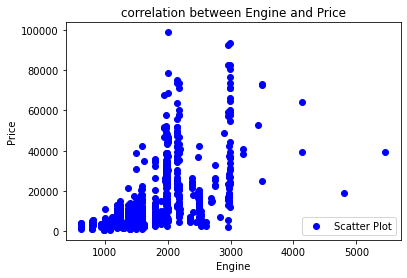

In [26]:
x = df.loc[0:1000, ['Engine']]
y = df.loc[0:1000, ['Price']]
plt.scatter(x.values, y.values, color = 'blue', label = 'Scatter Plot')
plt.title('correlation between Engine and Price')
plt.xlabel('Engine')
plt.ylabel('Price')
plt.legend(loc=4)
plt.show()

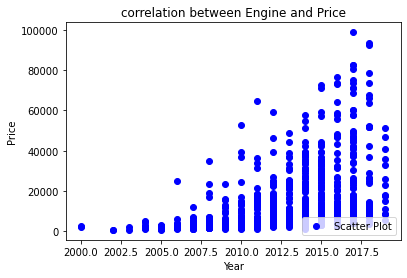

In [27]:
x = df.loc[0:1000, ['Year']]
y = df.loc[0:1000, ['Price']]
plt.scatter(x.values, y.values, color = 'blue', label = 'Scatter Plot')
plt.title('correlation between Engine and Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(loc=4)
plt.show()

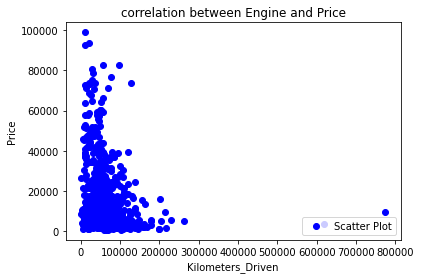

In [28]:
x = df.loc[0:1000, ['Kilometers_Driven']]
y = df.loc[0:1000, ['Price']]
plt.scatter(x.values, y.values, color = 'blue', label = 'Scatter Plot')
plt.title('correlation between Engine and Price')
plt.xlabel('Kilometers_Driven')
plt.ylabel('Price')
plt.legend(loc=4)
plt.show()

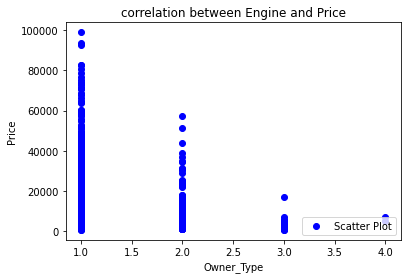

In [29]:
x = df.loc[0:1000, ['Owner_Type']]
y = df.loc[0:1000, ['Price']]
plt.scatter(x.values, y.values, color = 'blue', label = 'Scatter Plot')
plt.title('correlation between Engine and Price')
plt.xlabel('Owner_Type')
plt.ylabel('Price')
plt.legend(loc=4)
plt.show()

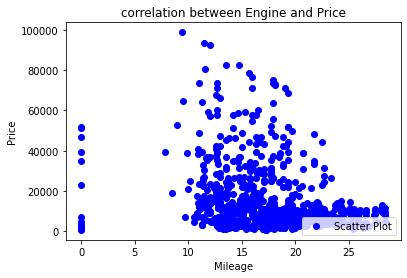

In [30]:
x = df.loc[0:1000, ['Mileage']]
y = df.loc[0:1000, ['Price']]
plt.scatter(x.values, y.values, color = 'blue', label = 'Scatter Plot')
plt.title('correlation between Engine and Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend(loc=4)
plt.show()

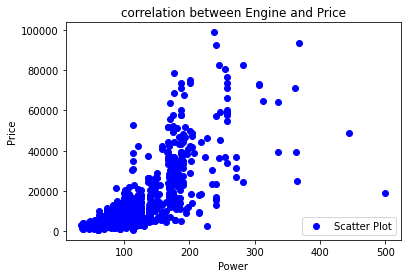

In [31]:
x = df.loc[0:1000, ['Power']]
y = df.loc[0:1000, ['Price']]
plt.scatter(x.values, y.values, color = 'blue', label = 'Scatter Plot')
plt.title('correlation between Engine and Price')
plt.xlabel('Power')
plt.ylabel('Price')
plt.legend(loc=4)
plt.show()

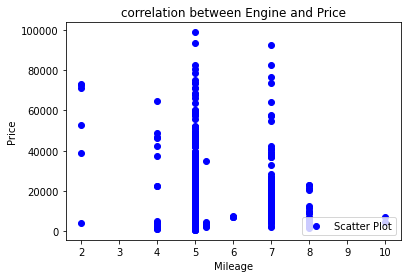

In [32]:
x = df.loc[0:1000, ['Seats']]
y = df.loc[0:1000, ['Price']]
plt.scatter(x.values, y.values, color = 'blue', label = 'Scatter Plot')
plt.title('correlation between Engine and Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend(loc=4)
plt.show()

נוסיף טבלת חום עם כל המשתנים שתדגים את הקשר במספר

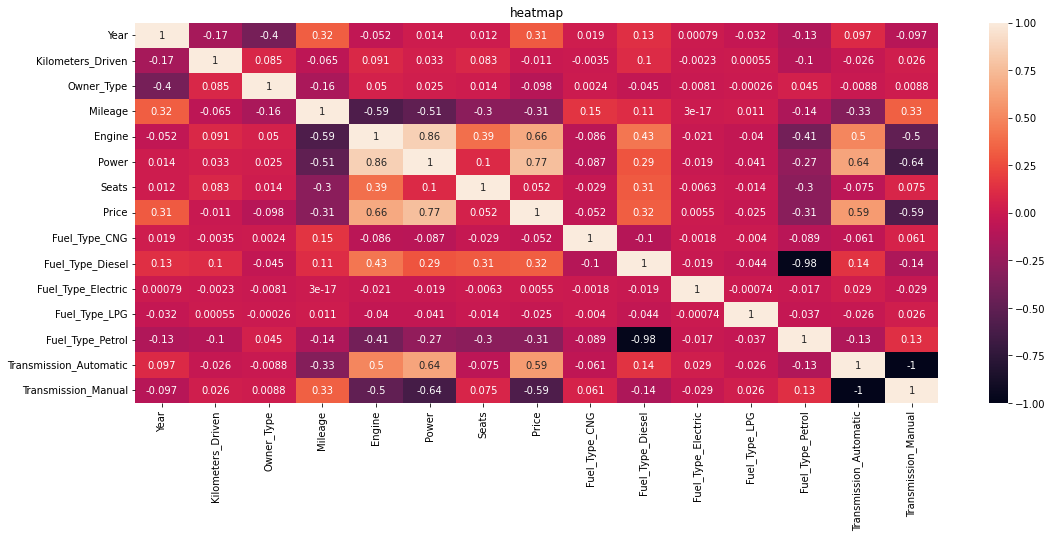

In [33]:
plt.figure(figsize = (18, 7))
correlation = df.corr()
sns.heatmap(correlation, annot =  True)
plt.title("heatmap")
plt.savefig('S.png')
plt.show()
plt.close()
plt.show()

נצליב משתנים ונראה אם יש השפעה ברורה של משתנים אחד על השני

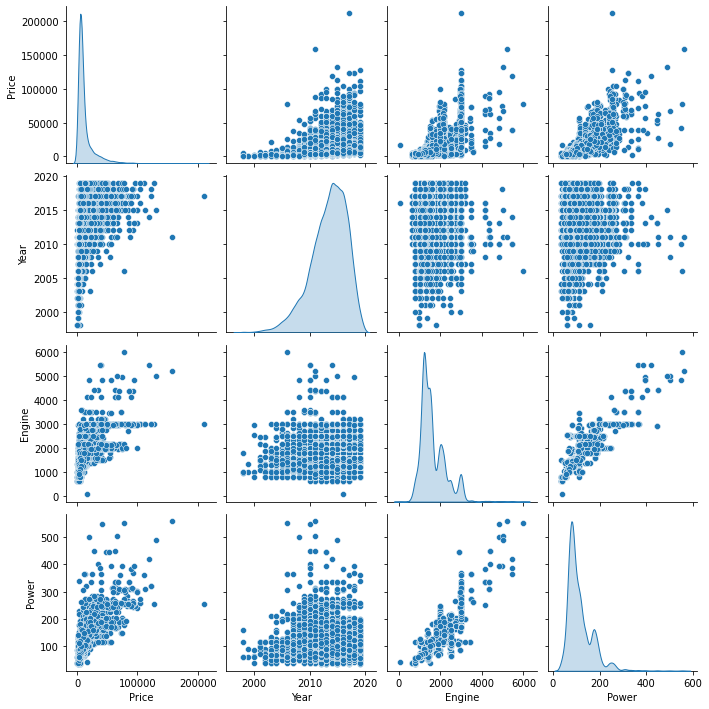

In [34]:
sns.pairplot(df[["Price", "Year", "Engine", "Power"]], 
    diag_kind="kde")

In [35]:
from sklearn.model_selection import train_test_split
X = df.drop(["Price"], axis=1) #נוריד את המחיר 
y = df["Price"]#נשאיר רק את המחיר


נפצל את הנתונים לבדיקה ואימון בחלוקה של 20 - 80 אחוזים

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape

((4815, 14), (1204, 14))

In [37]:
train_stats = X_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Year,4815.0,2013.359917,3.299711,1998.0,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,4815.0,59057.416407,100633.879160,171.0,33879.00,53000.00,73000.00,6500000.00
Owner_Type,4815.0,1.206854,0.461202,1.0,1.00,1.00,1.00,4.00
Mileage,4815.0,18.155547,4.604862,0.0,15.26,18.16,21.10,33.54
Engine,4815.0,1618.775762,596.720180,72.0,1198.00,1493.00,1968.50,5998.00
Power,4815.0,113.172772,53.669129,34.2,77.00,98.60,138.03,560.00
Seats,4815.0,5.275962,0.806217,2.0,5.00,5.00,5.00,10.00
Fuel_Type_CNG,4815.0,0.009969,0.099356,0.0,0.00,0.00,0.00,1.00
Fuel_Type_Diesel,4815.0,0.531256,0.499074,0.0,0.00,1.00,1.00,1.00
Fuel_Type_Electric,4815.0,0.000415,0.020378,0.0,0.00,0.00,0.00,1.00


נבצע נורמליזציה על הנתונים ונבדוק שהכל תקין

In [38]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [39]:
X_train = norm(X_train)
X_test = norm(X_test)

In [40]:
X_train.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
5165,-0.109075,-0.070130,-0.448510,0.096518,-0.706823,-0.510028,-0.342292,-0.100335,-1.064485,-0.020383,-0.038152,1.090133,-0.629265,0.629265
2060,0.193982,-0.348366,-0.448510,-0.227053,0.585240,1.139523,-0.342292,-0.100335,0.939227,-0.020383,-0.038152,-0.917129,1.588825,-1.588825
624,-1.321303,0.774516,1.719737,-1.076155,0.630487,1.058844,-0.342292,-0.100335,0.939227,-0.020383,-0.038152,-0.917129,1.588825,-1.588825
2242,-1.018246,0.506217,-0.448510,-0.850307,1.904116,1.142691,2.138429,-0.100335,0.939227,-0.020383,-0.038152,-0.917129,-0.629265,0.629265
2948,1.406209,-0.480389,-0.448510,0.242017,0.878509,1.014498,-0.342292,-0.100335,0.939227,-0.020383,-0.038152,-0.917129,1.588825,-1.588825


In [41]:
X_test['Fuel_Type_Electric'].fillna(0, inplace = True)

In [42]:
X_test.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
3304,-1.018246,0.605587,1.719737,-0.424670,-0.210778,-0.059117,-0.342292,-0.100335,0.939227,-0.020383,-0.038152,-0.917129,-0.629265,0.629265
3867,0.800095,-0.265442,-0.448510,-0.055495,0.878509,0.425333,-0.342292,-0.100335,0.939227,-0.020383,-0.038152,-0.917129,1.588825,-1.588825
3186,1.103152,0.037071,-0.448510,0.161667,-0.706823,-0.583441,-0.342292,-0.100335,-1.064485,-0.020383,-0.038152,1.090133,-0.629265,0.629265
1688,0.497038,0.026637,-0.448510,0.430947,-0.202399,-0.454130,-0.342292,-0.100335,0.939227,-0.020383,-0.038152,-0.917129,-0.629265,0.629265
751,0.800095,-0.111100,-0.448510,-0.389924,0.938839,1.388642,-0.342292,-0.100335,0.939227,-0.020383,-0.038152,-0.917129,1.588825,-1.588825


נבנה את רשת הנוירונים שלנו

ברשת ישנם 7 שכבות

In [43]:
from tensorflow.keras import regularizers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=[14], kernel_initializer='he_normal', kernel_regularizer=regularizers.l2()),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
  ])


נעשה נורמליזציה לפי פונקצית ונאתחל את המודל Adam

In [44]:
optimizer = keras.optimizers.Adam()
model.compile(loss = 'mse', optimizer = optimizer)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               3840      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

נתחיל לאמן את המודל 


In [45]:
history = model.fit(X_train, y_train, batch_size = 24, epochs = 1500)

Epoch 1/1500
201/201 [==============================] - 0s 778us/step - loss: 143687440.0000
Epoch 2/1500
201/201 [==============================] - 0s 748us/step - loss: 47107548.0000
Epoch 3/1500
201/201 [==============================] - 0s 773us/step - loss: 39911688.0000
Epoch 4/1500
201/201 [==============================] - 0s 853us/step - loss: 35393416.0000
Epoch 5/1500
201/201 [==============================] - 0s 753us/step - loss: 34218700.0000
Epoch 6/1500
201/201 [==============================] - 0s 808us/step - loss: 32381916.0000
Epoch 7/1500
201/201 [==============================] - 0s 783us/step - loss: 33286282.0000
Epoch 8/1500
201/201 [==============================] - 0s 763us/step - loss: 33560464.0000
Epoch 9/1500
201/201 [==============================] - 0s 878us/step - loss: 33650000.0000
Epoch 10/1500
201/201 [==============================] - 0s 758us/step - loss: 32322436.0000
Epoch 11/1500
201/201 [==============================] - 0s 753us/step - loss:

201/201 [==============================] - 0s 798us/step - loss: 20419986.0000
Epoch 90/1500
201/201 [==============================] - 0s 758us/step - loss: 20651580.0000
Epoch 91/1500
201/201 [==============================] - 0s 758us/step - loss: 19077796.0000
Epoch 92/1500
201/201 [==============================] - 0s 758us/step - loss: 21052728.0000
Epoch 93/1500
201/201 [==============================] - 0s 813us/step - loss: 18855750.0000
Epoch 94/1500
201/201 [==============================] - 0s 748us/step - loss: 20462778.0000
Epoch 95/1500
201/201 [==============================] - 0s 753us/step - loss: 20989834.0000
Epoch 96/1500
201/201 [==============================] - 0s 758us/step - loss: 19884326.0000
Epoch 97/1500
201/201 [==============================] - 0s 768us/step - loss: 20168730.0000
Epoch 98/1500
201/201 [==============================] - 0s 748us/step - loss: 20931944.0000
Epoch 99/1500
201/201 [==============================] - 0s 768us/step - loss: 20673

201/201 [==============================] - 0s 753us/step - loss: 12063489.0000
Epoch 177/1500
201/201 [==============================] - 0s 768us/step - loss: 12245462.0000
Epoch 178/1500
201/201 [==============================] - 0s 753us/step - loss: 12209227.0000
Epoch 179/1500
201/201 [==============================] - 0s 788us/step - loss: 13556863.0000
Epoch 180/1500
201/201 [==============================] - 0s 763us/step - loss: 12315095.0000
Epoch 181/1500
201/201 [==============================] - 0s 758us/step - loss: 14011762.0000
Epoch 182/1500
201/201 [==============================] - 0s 753us/step - loss: 12704826.0000
Epoch 183/1500
201/201 [==============================] - 0s 828us/step - loss: 11539591.0000
Epoch 184/1500
201/201 [==============================] - 0s 753us/step - loss: 16021270.0000
Epoch 185/1500
201/201 [==============================] - 0s 748us/step - loss: 12250443.0000
Epoch 186/1500
201/201 [==============================] - 0s 748us/step - l

201/201 [==============================] - 0s 848us/step - loss: 10044381.0000
Epoch 264/1500
201/201 [==============================] - 0s 828us/step - loss: 9744638.0000
Epoch 265/1500
201/201 [==============================] - 0s 808us/step - loss: 7983407.5000
Epoch 266/1500
201/201 [==============================] - 0s 833us/step - loss: 8903380.0000
Epoch 267/1500
201/201 [==============================] - 0s 808us/step - loss: 9622999.0000
Epoch 268/1500
201/201 [==============================] - 0s 863us/step - loss: 9794514.0000
Epoch 269/1500
201/201 [==============================] - 0s 853us/step - loss: 8841072.0000
Epoch 270/1500
201/201 [==============================] - 0s 813us/step - loss: 7851497.0000
Epoch 271/1500
201/201 [==============================] - 0s 808us/step - loss: 11816271.0000
Epoch 272/1500
201/201 [==============================] - 0s 833us/step - loss: 8633981.0000
Epoch 273/1500
201/201 [==============================] - 0s 808us/step - loss: 968

201/201 [==============================] - 0s 828us/step - loss: 5809377.5000
Epoch 352/1500
201/201 [==============================] - 0s 838us/step - loss: 7787796.5000
Epoch 353/1500
201/201 [==============================] - 0s 823us/step - loss: 8607997.0000
Epoch 354/1500
201/201 [==============================] - 0s 798us/step - loss: 7022990.5000
Epoch 355/1500
201/201 [==============================] - 0s 803us/step - loss: 7243181.0000
Epoch 356/1500
201/201 [==============================] - 0s 818us/step - loss: 7570497.5000
Epoch 357/1500
201/201 [==============================] - 0s 838us/step - loss: 9112695.0000
Epoch 358/1500
201/201 [==============================] - 0s 858us/step - loss: 6352767.5000
Epoch 359/1500
201/201 [==============================] - 0s 828us/step - loss: 5224670.0000
Epoch 360/1500
201/201 [==============================] - 0s 808us/step - loss: 5380517.0000
Epoch 361/1500
201/201 [==============================] - 0s 803us/step - loss: 43734

201/201 [==============================] - 0s 813us/step - loss: 2582674.2500
Epoch 440/1500
201/201 [==============================] - 0s 823us/step - loss: 2796516.0000
Epoch 441/1500
201/201 [==============================] - 0s 868us/step - loss: 2724586.7500
Epoch 442/1500
201/201 [==============================] - 0s 833us/step - loss: 3367957.2500
Epoch 443/1500
201/201 [==============================] - 0s 848us/step - loss: 3101384.7500
Epoch 444/1500
201/201 [==============================] - 0s 813us/step - loss: 3442091.7500
Epoch 445/1500
201/201 [==============================] - 0s 813us/step - loss: 3149511.2500
Epoch 446/1500
201/201 [==============================] - 0s 843us/step - loss: 2941144.0000
Epoch 447/1500
201/201 [==============================] - 0s 838us/step - loss: 2422988.2500
Epoch 448/1500
201/201 [==============================] - 0s 803us/step - loss: 3717061.7500
Epoch 449/1500
201/201 [==============================] - 0s 813us/step - loss: 66391

Epoch 527/1500
201/201 [==============================] - 0s 868us/step - loss: 1663997.7500
Epoch 528/1500
201/201 [==============================] - 0s 803us/step - loss: 1843446.0000
Epoch 529/1500
201/201 [==============================] - 0s 823us/step - loss: 3111896.5000
Epoch 530/1500
201/201 [==============================] - 0s 828us/step - loss: 2619180.5000
Epoch 531/1500
201/201 [==============================] - 0s 823us/step - loss: 2813999.7500
Epoch 532/1500
201/201 [==============================] - 0s 813us/step - loss: 2484354.7500
Epoch 533/1500
201/201 [==============================] - 0s 848us/step - loss: 1927061.5000
Epoch 534/1500
201/201 [==============================] - 0s 853us/step - loss: 1956457.0000
Epoch 535/1500
201/201 [==============================] - 0s 803us/step - loss: 2448985.7500
Epoch 536/1500
201/201 [==============================] - 0s 833us/step - loss: 5790252.5000
Epoch 537/1500
201/201 [==============================] - 0s 818us/ste

201/201 [==============================] - 0s 828us/step - loss: 3703123.0000
Epoch 616/1500
201/201 [==============================] - 0s 833us/step - loss: 7590306.5000
Epoch 617/1500
201/201 [==============================] - 0s 853us/step - loss: 9331179.0000
Epoch 618/1500
201/201 [==============================] - 0s 858us/step - loss: 3987745.2500
Epoch 619/1500
201/201 [==============================] - 0s 803us/step - loss: 4472631.0000
Epoch 620/1500
201/201 [==============================] - 0s 833us/step - loss: 7069539.0000
Epoch 621/1500
201/201 [==============================] - 0s 828us/step - loss: 7084988.5000
Epoch 622/1500
201/201 [==============================] - 0s 838us/step - loss: 7380995.5000
Epoch 623/1500
201/201 [==============================] - 0s 828us/step - loss: 3195402.0000
Epoch 624/1500
201/201 [==============================] - 0s 823us/step - loss: 6572509.5000
Epoch 625/1500
201/201 [==============================] - 0s 813us/step - loss: 57022

201/201 [==============================] - 0s 813us/step - loss: 1209327.2500
Epoch 704/1500
201/201 [==============================] - 0s 838us/step - loss: 1462080.7500
Epoch 705/1500
201/201 [==============================] - 0s 818us/step - loss: 1299094.2500
Epoch 706/1500
201/201 [==============================] - 0s 858us/step - loss: 1618035.2500
Epoch 707/1500
201/201 [==============================] - 0s 808us/step - loss: 1585164.8750
Epoch 708/1500
201/201 [==============================] - 0s 818us/step - loss: 1765961.6250
Epoch 709/1500
201/201 [==============================] - 0s 848us/step - loss: 1925394.3750
Epoch 710/1500
201/201 [==============================] - 0s 848us/step - loss: 1716957.8750
Epoch 711/1500
201/201 [==============================] - 0s 838us/step - loss: 1868977.6250
Epoch 712/1500
201/201 [==============================] - 0s 818us/step - loss: 1694450.3750
Epoch 713/1500
201/201 [==============================] - 0s 818us/step - loss: 19206

201/201 [==============================] - 0s 823us/step - loss: 1835186.6250
Epoch 792/1500
201/201 [==============================] - 0s 858us/step - loss: 1445633.0000
Epoch 793/1500
201/201 [==============================] - 0s 843us/step - loss: 1318020.1250
Epoch 794/1500
201/201 [==============================] - 0s 818us/step - loss: 1605659.1250
Epoch 795/1500
201/201 [==============================] - 0s 823us/step - loss: 1429118.8750
Epoch 796/1500
201/201 [==============================] - 0s 808us/step - loss: 2255505.2500
Epoch 797/1500
201/201 [==============================] - 0s 828us/step - loss: 1764232.7500
Epoch 798/1500
201/201 [==============================] - 0s 808us/step - loss: 1372740.0000
Epoch 799/1500
201/201 [==============================] - 0s 828us/step - loss: 1387196.6250
Epoch 800/1500
201/201 [==============================] - 0s 838us/step - loss: 1656382.0000
Epoch 801/1500
201/201 [==============================] - 0s 898us/step - loss: 14658

201/201 [==============================] - 0s 823us/step - loss: 8755198.0000
Epoch 880/1500
201/201 [==============================] - 0s 823us/step - loss: 6315609.5000
Epoch 881/1500
201/201 [==============================] - 0s 818us/step - loss: 5552251.5000
Epoch 882/1500
201/201 [==============================] - 0s 818us/step - loss: 2599690.7500
Epoch 883/1500
201/201 [==============================] - 0s 838us/step - loss: 1445902.6250
Epoch 884/1500
201/201 [==============================] - 0s 848us/step - loss: 1066875.8750
Epoch 885/1500
201/201 [==============================] - 0s 843us/step - loss: 1004910.8750
Epoch 886/1500
201/201 [==============================] - 0s 813us/step - loss: 972399.8750
Epoch 887/1500
201/201 [==============================] - 0s 828us/step - loss: 1041528.5000
Epoch 888/1500
201/201 [==============================] - 0s 878us/step - loss: 954473.5000
Epoch 889/1500
201/201 [==============================] - 0s 853us/step - loss: 1004502

201/201 [==============================] - 0s 903us/step - loss: 1562635.3750
Epoch 968/1500
201/201 [==============================] - 0s 803us/step - loss: 2150036.5000
Epoch 969/1500
201/201 [==============================] - 0s 803us/step - loss: 1525654.2500
Epoch 970/1500
201/201 [==============================] - 0s 818us/step - loss: 1790047.5000
Epoch 971/1500
201/201 [==============================] - 0s 813us/step - loss: 2114711.0000
Epoch 972/1500
201/201 [==============================] - 0s 823us/step - loss: 1983916.5000
Epoch 973/1500
201/201 [==============================] - 0s 848us/step - loss: 9200559.0000
Epoch 974/1500
201/201 [==============================] - 0s 813us/step - loss: 4217619.5000
Epoch 975/1500
201/201 [==============================] - 0s 808us/step - loss: 1359008.8750
Epoch 976/1500
201/201 [==============================] - 0s 813us/step - loss: 991176.6250
Epoch 977/1500
201/201 [==============================] - 0s 853us/step - loss: 911119

201/201 [==============================] - 0s 823us/step - loss: 1376357.1250
Epoch 1055/1500
201/201 [==============================] - 0s 808us/step - loss: 1348949.2500
Epoch 1056/1500
201/201 [==============================] - 0s 823us/step - loss: 1603426.2500
Epoch 1057/1500
201/201 [==============================] - 0s 878us/step - loss: 1985075.6250
Epoch 1058/1500
201/201 [==============================] - 0s 818us/step - loss: 1334390.1250
Epoch 1059/1500
201/201 [==============================] - 0s 838us/step - loss: 1220463.3750
Epoch 1060/1500
201/201 [==============================] - 0s 843us/step - loss: 2901324.5000
Epoch 1061/1500
201/201 [==============================] - 0s 828us/step - loss: 3535897.5000
Epoch 1062/1500
201/201 [==============================] - 0s 813us/step - loss: 1655956.3750
Epoch 1063/1500
201/201 [==============================] - 0s 897us/step - loss: 3343056.0000
Epoch 1064/1500
201/201 [==============================] - 0s 828us/step - l

201/201 [==============================] - 0s 833us/step - loss: 1486753.3750
Epoch 1142/1500
201/201 [==============================] - 0s 843us/step - loss: 3023371.0000
Epoch 1143/1500
201/201 [==============================] - 0s 813us/step - loss: 1859380.7500
Epoch 1144/1500
201/201 [==============================] - 0s 813us/step - loss: 1701804.3750
Epoch 1145/1500
201/201 [==============================] - 0s 808us/step - loss: 1616303.8750
Epoch 1146/1500
201/201 [==============================] - 0s 838us/step - loss: 1293606.1250
Epoch 1147/1500
201/201 [==============================] - 0s 823us/step - loss: 1272799.5000
Epoch 1148/1500
201/201 [==============================] - 0s 818us/step - loss: 986961.5000
Epoch 1149/1500
201/201 [==============================] - 0s 803us/step - loss: 1078961.0000
Epoch 1150/1500
201/201 [==============================] - 0s 818us/step - loss: 1016981.3125
Epoch 1151/1500
201/201 [==============================] - 0s 813us/step - lo

201/201 [==============================] - 0s 813us/step - loss: 1228291.2500
Epoch 1229/1500
201/201 [==============================] - 0s 823us/step - loss: 1443154.3750
Epoch 1230/1500
201/201 [==============================] - 0s 828us/step - loss: 1337681.5000
Epoch 1231/1500
201/201 [==============================] - 0s 813us/step - loss: 1055646.1250
Epoch 1232/1500
201/201 [==============================] - 0s 813us/step - loss: 3765682.5000
Epoch 1233/1500
201/201 [==============================] - 0s 813us/step - loss: 8970496.0000
Epoch 1234/1500
201/201 [==============================] - 0s 808us/step - loss: 4368035.5000
Epoch 1235/1500
201/201 [==============================] - 0s 873us/step - loss: 9737707.0000
Epoch 1236/1500
201/201 [==============================] - 0s 833us/step - loss: 5673040.0000
Epoch 1237/1500
201/201 [==============================] - 0s 828us/step - loss: 2450331.5000
Epoch 1238/1500
201/201 [==============================] - 0s 823us/step - l

201/201 [==============================] - 0s 813us/step - loss: 702151.3125
Epoch 1316/1500
201/201 [==============================] - 0s 813us/step - loss: 773752.8750
Epoch 1317/1500
201/201 [==============================] - 0s 803us/step - loss: 901607.3125
Epoch 1318/1500
201/201 [==============================] - 0s 858us/step - loss: 976920.6875
Epoch 1319/1500
201/201 [==============================] - 0s 818us/step - loss: 4159591.7500
Epoch 1320/1500
201/201 [==============================] - 0s 833us/step - loss: 5246467.5000
Epoch 1321/1500
201/201 [==============================] - 0s 823us/step - loss: 2229026.7500
Epoch 1322/1500
201/201 [==============================] - 0s 813us/step - loss: 1047178.1250
Epoch 1323/1500
201/201 [==============================] - 0s 818us/step - loss: 808926.8750
Epoch 1324/1500
201/201 [==============================] - 0s 818us/step - loss: 856435.9375
Epoch 1325/1500
201/201 [==============================] - 0s 823us/step - loss: 6

Epoch 1403/1500
201/201 [==============================] - 0s 833us/step - loss: 1102943.2500
Epoch 1404/1500
201/201 [==============================] - 0s 838us/step - loss: 893725.0625
Epoch 1405/1500
201/201 [==============================] - 0s 823us/step - loss: 726589.6250
Epoch 1406/1500
201/201 [==============================] - 0s 828us/step - loss: 710217.8750
Epoch 1407/1500
201/201 [==============================] - 0s 813us/step - loss: 1174725.6250
Epoch 1408/1500
201/201 [==============================] - 0s 813us/step - loss: 794611.5000
Epoch 1409/1500
201/201 [==============================] - 0s 818us/step - loss: 2779145.7500
Epoch 1410/1500
201/201 [==============================] - 0s 883us/step - loss: 4443355.5000
Epoch 1411/1500
201/201 [==============================] - 0s 808us/step - loss: 10001282.0000
Epoch 1412/1500
201/201 [==============================] - 0s 818us/step - loss: 2511991.7500
Epoch 1413/1500
201/201 [==============================] - 0s 8

201/201 [==============================] - 0s 848us/step - loss: 681602.0625
Epoch 1491/1500
201/201 [==============================] - 0s 813us/step - loss: 649594.7500
Epoch 1492/1500
201/201 [==============================] - 0s 818us/step - loss: 587113.6875
Epoch 1493/1500
201/201 [==============================] - 0s 903us/step - loss: 708214.0000
Epoch 1494/1500
201/201 [==============================] - 0s 823us/step - loss: 926678.7500
Epoch 1495/1500
201/201 [==============================] - 0s 833us/step - loss: 1046973.3125
Epoch 1496/1500
201/201 [==============================] - 0s 813us/step - loss: 736690.1250
Epoch 1497/1500
201/201 [==============================] - 0s 833us/step - loss: 639978.5000
Epoch 1498/1500
201/201 [==============================] - 0s 823us/step - loss: 739382.5000
Epoch 1499/1500
201/201 [==============================] - 0s 868us/step - loss: 990378.0000
Epoch 1500/1500
201/201 [==============================] - 0s 828us/step - loss: 1130

In [46]:
history = model.fit(X_train, y_train, batch_size = 24, epochs = 1500)

Epoch 1/1500
201/201 [==============================] - 0s 813us/step - loss: 1419010.6250
Epoch 2/1500
201/201 [==============================] - 0s 882us/step - loss: 987040.5000
Epoch 3/1500
201/201 [==============================] - 0s 823us/step - loss: 913714.5625
Epoch 4/1500
201/201 [==============================] - 0s 828us/step - loss: 968713.5625
Epoch 5/1500
201/201 [==============================] - 0s 868us/step - loss: 917067.8125
Epoch 6/1500
201/201 [==============================] - 0s 828us/step - loss: 751372.9375
Epoch 7/1500
201/201 [==============================] - 0s 838us/step - loss: 876422.4375
Epoch 8/1500
201/201 [==============================] - 0s 1ms/step - loss: 1045562.6875
Epoch 9/1500
201/201 [==============================] - 0s 923us/step - loss: 1126342.1250
Epoch 10/1500
201/201 [==============================] - 0s 962us/step - loss: 1723566.6250
Epoch 11/1500
201/201 [==============================] - 0s 918us/step - loss: 936156.0000
Epoch 

Epoch 91/1500
201/201 [==============================] - 0s 858us/step - loss: 935646.2500
Epoch 92/1500
201/201 [==============================] - 0s 883us/step - loss: 913370.8750
Epoch 93/1500
201/201 [==============================] - 0s 843us/step - loss: 617929.3750
Epoch 94/1500
201/201 [==============================] - 0s 828us/step - loss: 703408.7500
Epoch 95/1500
201/201 [==============================] - 0s 818us/step - loss: 808146.2500
Epoch 96/1500
201/201 [==============================] - 0s 868us/step - loss: 957723.2500
Epoch 97/1500
201/201 [==============================] - 0s 818us/step - loss: 765034.3125
Epoch 98/1500
201/201 [==============================] - 0s 843us/step - loss: 1047492.4375
Epoch 99/1500
201/201 [==============================] - 0s 823us/step - loss: 910141.0625
Epoch 100/1500
201/201 [==============================] - 0s 868us/step - loss: 690966.0625
Epoch 101/1500
201/201 [==============================] - 0s 878us/step - loss: 620308.3

201/201 [==============================] - 0s 833us/step - loss: 537738.6875
Epoch 181/1500
201/201 [==============================] - 0s 888us/step - loss: 566242.5625
Epoch 182/1500
201/201 [==============================] - 0s 868us/step - loss: 546286.6250
Epoch 183/1500
201/201 [==============================] - 0s 818us/step - loss: 589434.3750
Epoch 184/1500
201/201 [==============================] - 0s 858us/step - loss: 572035.3125
Epoch 185/1500
201/201 [==============================] - 0s 823us/step - loss: 659521.6250
Epoch 186/1500
201/201 [==============================] - 0s 818us/step - loss: 656164.8750
Epoch 187/1500
201/201 [==============================] - 0s 858us/step - loss: 675515.3750
Epoch 188/1500
201/201 [==============================] - 0s 828us/step - loss: 703433.4375
Epoch 189/1500
201/201 [==============================] - 0s 833us/step - loss: 525898.9375
Epoch 190/1500
201/201 [==============================] - 0s 823us/step - loss: 545319.6250
Epo

201/201 [==============================] - 0s 858us/step - loss: 1011479.1250
Epoch 270/1500
201/201 [==============================] - 0s 833us/step - loss: 683574.3750
Epoch 271/1500
201/201 [==============================] - 0s 818us/step - loss: 501012.8438
Epoch 272/1500
201/201 [==============================] - 0s 828us/step - loss: 442772.7812
Epoch 273/1500
201/201 [==============================] - 0s 883us/step - loss: 492584.9375
Epoch 274/1500
201/201 [==============================] - 0s 888us/step - loss: 540409.4375
Epoch 275/1500
201/201 [==============================] - 0s 923us/step - loss: 626060.8125
Epoch 276/1500
201/201 [==============================] - 0s 972us/step - loss: 767423.1875
Epoch 277/1500
201/201 [==============================] - 0s 918us/step - loss: 1049652.5000
Epoch 278/1500
201/201 [==============================] - 0s 888us/step - loss: 979199.8125
Epoch 279/1500
201/201 [==============================] - 0s 873us/step - loss: 757313.3125
E

201/201 [==============================] - 0s 833us/step - loss: 543209.3750
Epoch 359/1500
201/201 [==============================] - 0s 833us/step - loss: 546701.3750
Epoch 360/1500
201/201 [==============================] - 0s 818us/step - loss: 608509.0000
Epoch 361/1500
201/201 [==============================] - 0s 848us/step - loss: 887339.1250
Epoch 362/1500
201/201 [==============================] - 0s 843us/step - loss: 772941.8125
Epoch 363/1500
201/201 [==============================] - 0s 878us/step - loss: 672835.5000
Epoch 364/1500
201/201 [==============================] - 0s 838us/step - loss: 654406.6875
Epoch 365/1500
201/201 [==============================] - 0s 838us/step - loss: 782887.6875
Epoch 366/1500
201/201 [==============================] - 0s 818us/step - loss: 680850.0000
Epoch 367/1500
201/201 [==============================] - 0s 818us/step - loss: 527559.9375
Epoch 368/1500
201/201 [==============================] - 0s 858us/step - loss: 997109.1875
Epo

201/201 [==============================] - 0s 853us/step - loss: 682760.7500
Epoch 448/1500
201/201 [==============================] - 0s 818us/step - loss: 570577.8750
Epoch 449/1500
201/201 [==============================] - 0s 818us/step - loss: 534879.5625
Epoch 450/1500
201/201 [==============================] - 0s 818us/step - loss: 604461.7500
Epoch 451/1500
201/201 [==============================] - 0s 868us/step - loss: 646660.1250
Epoch 452/1500
201/201 [==============================] - 0s 863us/step - loss: 668434.7500
Epoch 453/1500
201/201 [==============================] - 0s 848us/step - loss: 597881.6875
Epoch 454/1500
201/201 [==============================] - 0s 878us/step - loss: 951872.5625
Epoch 455/1500
201/201 [==============================] - 0s 818us/step - loss: 901403.6875
Epoch 456/1500
201/201 [==============================] - 0s 818us/step - loss: 903551.2500
Epoch 457/1500
201/201 [==============================] - 0s 858us/step - loss: 787083.2500
Epo

201/201 [==============================] - 0s 878us/step - loss: 480299.1562
Epoch 537/1500
201/201 [==============================] - 0s 823us/step - loss: 545442.3750
Epoch 538/1500
201/201 [==============================] - 0s 823us/step - loss: 536231.1250
Epoch 539/1500
201/201 [==============================] - 0s 828us/step - loss: 775390.3750
Epoch 540/1500
201/201 [==============================] - 0s 873us/step - loss: 768940.3750
Epoch 541/1500
201/201 [==============================] - 0s 853us/step - loss: 769852.6875
Epoch 542/1500
201/201 [==============================] - 0s 818us/step - loss: 600113.1250
Epoch 543/1500
201/201 [==============================] - 0s 823us/step - loss: 511354.5000
Epoch 544/1500
201/201 [==============================] - 0s 823us/step - loss: 661820.7500
Epoch 545/1500
201/201 [==============================] - 0s 888us/step - loss: 961253.2500
Epoch 546/1500
201/201 [==============================] - 0s 838us/step - loss: 749241.8750
Epo

201/201 [==============================] - 0s 828us/step - loss: 509536.5000
Epoch 626/1500
201/201 [==============================] - 0s 818us/step - loss: 539022.4375
Epoch 627/1500
201/201 [==============================] - 0s 823us/step - loss: 459033.4062
Epoch 628/1500
201/201 [==============================] - 0s 903us/step - loss: 403363.4062
Epoch 629/1500
201/201 [==============================] - 0s 853us/step - loss: 413538.8125
Epoch 630/1500
201/201 [==============================] - 0s 908us/step - loss: 546182.8125
Epoch 631/1500
201/201 [==============================] - 0s 823us/step - loss: 712842.0000
Epoch 632/1500
201/201 [==============================] - 0s 823us/step - loss: 704995.3125
Epoch 633/1500
201/201 [==============================] - 0s 833us/step - loss: 572433.0625
Epoch 634/1500
201/201 [==============================] - 0s 848us/step - loss: 593344.1875
Epoch 635/1500
201/201 [==============================] - 0s 878us/step - loss: 496867.0312
Epo

201/201 [==============================] - 0s 833us/step - loss: 534377.8125
Epoch 715/1500
201/201 [==============================] - 0s 818us/step - loss: 671707.1250
Epoch 716/1500
201/201 [==============================] - 0s 818us/step - loss: 414695.6562
Epoch 717/1500
201/201 [==============================] - 0s 913us/step - loss: 544735.8125
Epoch 718/1500
201/201 [==============================] - 0s 838us/step - loss: 531350.8125
Epoch 719/1500
201/201 [==============================] - 0s 898us/step - loss: 515425.0312
Epoch 720/1500
201/201 [==============================] - 0s 863us/step - loss: 642280.6875
Epoch 721/1500
201/201 [==============================] - 0s 863us/step - loss: 843489.9375
Epoch 722/1500
201/201 [==============================] - 0s 873us/step - loss: 651060.6875
Epoch 723/1500
201/201 [==============================] - 0s 823us/step - loss: 397254.2812
Epoch 724/1500
201/201 [==============================] - 0s 843us/step - loss: 442112.5000
Epo

201/201 [==============================] - 0s 818us/step - loss: 535712.1250
Epoch 804/1500
201/201 [==============================] - 0s 818us/step - loss: 3406903.0000
Epoch 805/1500
201/201 [==============================] - 0s 883us/step - loss: 2257670.5000
Epoch 806/1500
201/201 [==============================] - 0s 848us/step - loss: 683472.8750
Epoch 807/1500
201/201 [==============================] - 0s 883us/step - loss: 378467.5625
Epoch 808/1500
201/201 [==============================] - 0s 838us/step - loss: 297368.3125
Epoch 809/1500
201/201 [==============================] - 0s 828us/step - loss: 305442.7812
Epoch 810/1500
201/201 [==============================] - 0s 868us/step - loss: 307762.7812
Epoch 811/1500
201/201 [==============================] - 0s 843us/step - loss: 281878.3438
Epoch 812/1500
201/201 [==============================] - 0s 833us/step - loss: 282299.2500
Epoch 813/1500
201/201 [==============================] - 0s 823us/step - loss: 313160.5312
E

201/201 [==============================] - 0s 833us/step - loss: 306174.6562
Epoch 892/1500
201/201 [==============================] - 0s 873us/step - loss: 360441.3125
Epoch 893/1500
201/201 [==============================] - 0s 828us/step - loss: 412473.9375
Epoch 894/1500
201/201 [==============================] - 0s 853us/step - loss: 595821.6250
Epoch 895/1500
201/201 [==============================] - 0s 848us/step - loss: 602167.7500
Epoch 896/1500
201/201 [==============================] - 0s 818us/step - loss: 484912.2812
Epoch 897/1500
201/201 [==============================] - 0s 853us/step - loss: 481427.3125
Epoch 898/1500
201/201 [==============================] - 0s 828us/step - loss: 547435.0000
Epoch 899/1500
201/201 [==============================] - 0s 823us/step - loss: 429736.1875
Epoch 900/1500
201/201 [==============================] - 0s 858us/step - loss: 368785.8750
Epoch 901/1500
201/201 [==============================] - 0s 863us/step - loss: 324658.7188
Epo

201/201 [==============================] - 0s 828us/step - loss: 709797.1250
Epoch 980/1500
201/201 [==============================] - 0s 828us/step - loss: 797053.6875
Epoch 981/1500
201/201 [==============================] - 0s 828us/step - loss: 452169.9688
Epoch 982/1500
201/201 [==============================] - 0s 873us/step - loss: 404484.1562
Epoch 983/1500
201/201 [==============================] - 0s 883us/step - loss: 401438.8750
Epoch 984/1500
201/201 [==============================] - 0s 848us/step - loss: 619573.5625
Epoch 985/1500
201/201 [==============================] - 0s 823us/step - loss: 503301.3750
Epoch 986/1500
201/201 [==============================] - 0s 853us/step - loss: 440614.3125
Epoch 987/1500
201/201 [==============================] - 0s 813us/step - loss: 391709.0938
Epoch 988/1500
201/201 [==============================] - 0s 858us/step - loss: 444904.9375
Epoch 989/1500
201/201 [==============================] - 0s 818us/step - loss: 604431.5000
Epo

201/201 [==============================] - 0s 833us/step - loss: 572936.3750
Epoch 1068/1500
201/201 [==============================] - 0s 818us/step - loss: 849802.1875
Epoch 1069/1500
201/201 [==============================] - 0s 833us/step - loss: 625790.0625
Epoch 1070/1500
201/201 [==============================] - 0s 868us/step - loss: 668657.1250
Epoch 1071/1500
201/201 [==============================] - 0s 828us/step - loss: 655857.5000
Epoch 1072/1500
201/201 [==============================] - 0s 823us/step - loss: 389297.4375
Epoch 1073/1500
201/201 [==============================] - 0s 868us/step - loss: 484308.7188
Epoch 1074/1500
201/201 [==============================] - 0s 833us/step - loss: 444928.0625
Epoch 1075/1500
201/201 [==============================] - 0s 838us/step - loss: 285240.3438
Epoch 1076/1500
201/201 [==============================] - 0s 873us/step - loss: 328161.5000
Epoch 1077/1500
201/201 [==============================] - 0s 828us/step - loss: 31885

201/201 [==============================] - 0s 878us/step - loss: 417015.5312
Epoch 1156/1500
201/201 [==============================] - 0s 828us/step - loss: 358925.7500
Epoch 1157/1500
201/201 [==============================] - 0s 818us/step - loss: 316637.0312
Epoch 1158/1500
201/201 [==============================] - 0s 833us/step - loss: 346530.3750
Epoch 1159/1500
201/201 [==============================] - 0s 848us/step - loss: 369196.0000
Epoch 1160/1500
201/201 [==============================] - 0s 858us/step - loss: 533358.1250
Epoch 1161/1500
201/201 [==============================] - 0s 843us/step - loss: 492550.9062
Epoch 1162/1500
201/201 [==============================] - 0s 828us/step - loss: 430136.6562
Epoch 1163/1500
201/201 [==============================] - 0s 818us/step - loss: 530878.8750
Epoch 1164/1500
201/201 [==============================] - 0s 878us/step - loss: 434447.4375
Epoch 1165/1500
201/201 [==============================] - 0s 873us/step - loss: 40550

201/201 [==============================] - 0s 828us/step - loss: 256666.0781
Epoch 1244/1500
201/201 [==============================] - 0s 818us/step - loss: 256569.2344
Epoch 1245/1500
201/201 [==============================] - 0s 808us/step - loss: 242348.3125
Epoch 1246/1500
201/201 [==============================] - 0s 828us/step - loss: 262291.1875
Epoch 1247/1500
201/201 [==============================] - 0s 888us/step - loss: 267500.8750
Epoch 1248/1500
201/201 [==============================] - 0s 868us/step - loss: 267634.2500
Epoch 1249/1500
201/201 [==============================] - 0s 828us/step - loss: 307307.5938
Epoch 1250/1500
201/201 [==============================] - 0s 823us/step - loss: 508143.6250
Epoch 1251/1500
201/201 [==============================] - 0s 818us/step - loss: 531664.9375
Epoch 1252/1500
201/201 [==============================] - 0s 828us/step - loss: 441723.2812
Epoch 1253/1500
201/201 [==============================] - 0s 858us/step - loss: 47239

201/201 [==============================] - 0s 863us/step - loss: 334897.7812
Epoch 1332/1500
201/201 [==============================] - 0s 818us/step - loss: 431742.6875
Epoch 1333/1500
201/201 [==============================] - 0s 818us/step - loss: 583588.1875
Epoch 1334/1500
201/201 [==============================] - 0s 828us/step - loss: 1838198.5000
Epoch 1335/1500
201/201 [==============================] - 0s 823us/step - loss: 522476.5000
Epoch 1336/1500
201/201 [==============================] - 0s 828us/step - loss: 477659.6250
Epoch 1337/1500
201/201 [==============================] - 0s 858us/step - loss: 512590.0000
Epoch 1338/1500
201/201 [==============================] - 0s 923us/step - loss: 385360.8125
Epoch 1339/1500
201/201 [==============================] - 0s 828us/step - loss: 299546.2500
Epoch 1340/1500
201/201 [==============================] - 0s 828us/step - loss: 267134.5312
Epoch 1341/1500
201/201 [==============================] - 0s 838us/step - loss: 2595

201/201 [==============================] - 0s 868us/step - loss: 232577.4844
Epoch 1420/1500
201/201 [==============================] - 0s 878us/step - loss: 204661.1250
Epoch 1421/1500
201/201 [==============================] - 0s 813us/step - loss: 203017.3594
Epoch 1422/1500
201/201 [==============================] - 0s 873us/step - loss: 217718.7656
Epoch 1423/1500
201/201 [==============================] - 0s 838us/step - loss: 217733.1875
Epoch 1424/1500
201/201 [==============================] - 0s 833us/step - loss: 229379.7812
Epoch 1425/1500
201/201 [==============================] - 0s 893us/step - loss: 253439.5781
Epoch 1426/1500
201/201 [==============================] - 0s 853us/step - loss: 308021.2812
Epoch 1427/1500
201/201 [==============================] - 0s 843us/step - loss: 368762.8438
Epoch 1428/1500
201/201 [==============================] - 0s 828us/step - loss: 451824.4375
Epoch 1429/1500
201/201 [==============================] - 0s 898us/step - loss: 54664

In [47]:
history = model.fit(X_train, y_train, batch_size = 24, epochs = 1500)

Epoch 1/1500
201/201 [==============================] - 0s 918us/step - loss: 911025.3750
Epoch 2/1500
201/201 [==============================] - 0s 848us/step - loss: 620671.1250
Epoch 3/1500
201/201 [==============================] - 0s 818us/step - loss: 772408.2500
Epoch 4/1500
201/201 [==============================] - 0s 818us/step - loss: 582334.1250
Epoch 5/1500
201/201 [==============================] - 0s 838us/step - loss: 588305.2500
Epoch 6/1500
201/201 [==============================] - 0s 833us/step - loss: 571817.6875
Epoch 7/1500
201/201 [==============================] - 0s 903us/step - loss: 479127.5312
Epoch 8/1500
201/201 [==============================] - 0s 823us/step - loss: 404787.5938
Epoch 9/1500
201/201 [==============================] - 0s 823us/step - loss: 358789.5625
Epoch 10/1500
201/201 [==============================] - 0s 858us/step - loss: 412198.5625
Epoch 11/1500
201/201 [==============================] - 0s 833us/step - loss: 351001.6562
Epoch 12

201/201 [==============================] - 0s 843us/step - loss: 437123.7188
Epoch 92/1500
201/201 [==============================] - 0s 818us/step - loss: 467234.9375
Epoch 93/1500
201/201 [==============================] - 0s 883us/step - loss: 591143.1875
Epoch 94/1500
201/201 [==============================] - 0s 833us/step - loss: 436670.7500
Epoch 95/1500
201/201 [==============================] - 0s 818us/step - loss: 479024.9688
Epoch 96/1500
201/201 [==============================] - 0s 823us/step - loss: 403626.4688
Epoch 97/1500
201/201 [==============================] - 0s 843us/step - loss: 328467.2188
Epoch 98/1500
201/201 [==============================] - 0s 823us/step - loss: 291487.5625
Epoch 99/1500
201/201 [==============================] - 0s 818us/step - loss: 273329.0312
Epoch 100/1500
201/201 [==============================] - 0s 818us/step - loss: 468292.5312
Epoch 101/1500
201/201 [==============================] - 0s 813us/step - loss: 419020.8125
Epoch 102/1

201/201 [==============================] - 0s 838us/step - loss: 273249.6562
Epoch 181/1500
201/201 [==============================] - 0s 813us/step - loss: 331846.9062
Epoch 182/1500
201/201 [==============================] - 0s 838us/step - loss: 313411.8438
Epoch 183/1500
201/201 [==============================] - 0s 868us/step - loss: 295808.0625
Epoch 184/1500
201/201 [==============================] - 0s 818us/step - loss: 313181.0625
Epoch 185/1500
201/201 [==============================] - 0s 853us/step - loss: 494365.6562
Epoch 186/1500
201/201 [==============================] - 0s 828us/step - loss: 517361.4375
Epoch 187/1500
201/201 [==============================] - 0s 813us/step - loss: 462786.9688
Epoch 188/1500
201/201 [==============================] - 0s 823us/step - loss: 349197.4375
Epoch 189/1500
201/201 [==============================] - 0s 833us/step - loss: 276237.1875
Epoch 190/1500
201/201 [==============================] - 0s 818us/step - loss: 290556.7812
Epo

201/201 [==============================] - 0s 848us/step - loss: 312552.7188
Epoch 270/1500
201/201 [==============================] - 0s 833us/step - loss: 324363.0000
Epoch 271/1500
201/201 [==============================] - 0s 848us/step - loss: 344567.6562
Epoch 272/1500
201/201 [==============================] - 0s 858us/step - loss: 435422.2188
Epoch 273/1500
201/201 [==============================] - 0s 818us/step - loss: 424560.3125
Epoch 274/1500
201/201 [==============================] - 0s 828us/step - loss: 518638.7812
Epoch 275/1500
201/201 [==============================] - 0s 843us/step - loss: 521188.0938
Epoch 276/1500
201/201 [==============================] - 0s 823us/step - loss: 366772.7812
Epoch 277/1500
201/201 [==============================] - 0s 873us/step - loss: 427163.7188
Epoch 278/1500
201/201 [==============================] - 0s 828us/step - loss: 359297.9062
Epoch 279/1500
201/201 [==============================] - 0s 818us/step - loss: 413419.2500
Epo

201/201 [==============================] - 0s 823us/step - loss: 1800624.3750
Epoch 359/1500
201/201 [==============================] - 0s 888us/step - loss: 3570582.2500
Epoch 360/1500
201/201 [==============================] - 0s 813us/step - loss: 2184713.2500
Epoch 361/1500
201/201 [==============================] - 0s 878us/step - loss: 4332740.0000
Epoch 362/1500
201/201 [==============================] - 0s 853us/step - loss: 519123.6562
Epoch 363/1500
201/201 [==============================] - 0s 823us/step - loss: 415159.3750
Epoch 364/1500
201/201 [==============================] - 0s 833us/step - loss: 211541.8125
Epoch 365/1500
201/201 [==============================] - 0s 828us/step - loss: 190124.2656
Epoch 366/1500
201/201 [==============================] - 0s 813us/step - loss: 187607.5781
Epoch 367/1500
201/201 [==============================] - 0s 828us/step - loss: 179373.5312
Epoch 368/1500
201/201 [==============================] - 0s 843us/step - loss: 188106.5312

201/201 [==============================] - 0s 818us/step - loss: 534915.1875
Epoch 448/1500
201/201 [==============================] - 0s 838us/step - loss: 964475.8125
Epoch 449/1500
201/201 [==============================] - 0s 818us/step - loss: 532080.8125
Epoch 450/1500
201/201 [==============================] - 0s 818us/step - loss: 2527154.2500
Epoch 451/1500
201/201 [==============================] - 0s 878us/step - loss: 3844223.5000
Epoch 452/1500
201/201 [==============================] - 0s 838us/step - loss: 1677459.7500
Epoch 453/1500
201/201 [==============================] - 0s 818us/step - loss: 436231.2500
Epoch 454/1500
201/201 [==============================] - 0s 848us/step - loss: 234198.7656
Epoch 455/1500
201/201 [==============================] - 0s 813us/step - loss: 207981.7344
Epoch 456/1500
201/201 [==============================] - 0s 828us/step - loss: 197262.1875
Epoch 457/1500
201/201 [==============================] - 0s 813us/step - loss: 185598.5000


201/201 [==============================] - 0s 843us/step - loss: 348687.2188
Epoch 537/1500
201/201 [==============================] - 0s 808us/step - loss: 333603.2500
Epoch 538/1500
201/201 [==============================] - 0s 818us/step - loss: 336709.7188
Epoch 539/1500
201/201 [==============================] - 0s 813us/step - loss: 411456.8750
Epoch 540/1500
201/201 [==============================] - 0s 818us/step - loss: 408216.7188
Epoch 541/1500
201/201 [==============================] - 0s 838us/step - loss: 484969.3750
Epoch 542/1500
201/201 [==============================] - 0s 868us/step - loss: 441210.9688
Epoch 543/1500
201/201 [==============================] - 0s 828us/step - loss: 294715.7812
Epoch 544/1500
201/201 [==============================] - 0s 838us/step - loss: 368569.6562
Epoch 545/1500
201/201 [==============================] - 0s 813us/step - loss: 453713.3438
Epoch 546/1500
201/201 [==============================] - 0s 808us/step - loss: 444228.0938
Epo

201/201 [==============================] - 0s 873us/step - loss: 579329.3125
Epoch 626/1500
201/201 [==============================] - 0s 828us/step - loss: 1522740.7500
Epoch 627/1500
201/201 [==============================] - 0s 833us/step - loss: 812703.0625
Epoch 628/1500
201/201 [==============================] - 0s 823us/step - loss: 296299.3125
Epoch 629/1500
201/201 [==============================] - 0s 828us/step - loss: 226817.5625
Epoch 630/1500
201/201 [==============================] - 0s 833us/step - loss: 210291.9531
Epoch 631/1500
201/201 [==============================] - 0s 853us/step - loss: 207809.4688
Epoch 632/1500
201/201 [==============================] - 0s 843us/step - loss: 213434.5156
Epoch 633/1500
201/201 [==============================] - 0s 823us/step - loss: 214529.7812
Epoch 634/1500
201/201 [==============================] - 0s 972us/step - loss: 235422.3594
Epoch 635/1500
201/201 [==============================] - 0s 878us/step - loss: 258496.2188
Ep

201/201 [==============================] - 0s 828us/step - loss: 274179.8750
Epoch 715/1500
201/201 [==============================] - 0s 833us/step - loss: 274552.0938
Epoch 716/1500
201/201 [==============================] - 0s 868us/step - loss: 299653.5938
Epoch 717/1500
201/201 [==============================] - 0s 823us/step - loss: 349312.0000
Epoch 718/1500
201/201 [==============================] - 0s 813us/step - loss: 432169.9375
Epoch 719/1500
201/201 [==============================] - 0s 828us/step - loss: 451968.4375
Epoch 720/1500
201/201 [==============================] - 0s 863us/step - loss: 690801.5625
Epoch 721/1500
201/201 [==============================] - 0s 833us/step - loss: 464732.6562
Epoch 722/1500
201/201 [==============================] - 0s 818us/step - loss: 589198.1875
Epoch 723/1500
201/201 [==============================] - 0s 818us/step - loss: 500225.6875
Epoch 724/1500
201/201 [==============================] - 0s 823us/step - loss: 403644.0625
Epo

201/201 [==============================] - 0s 843us/step - loss: 252415.0469
Epoch 804/1500
201/201 [==============================] - 0s 828us/step - loss: 264880.6875
Epoch 805/1500
201/201 [==============================] - 0s 818us/step - loss: 292060.4688
Epoch 806/1500
201/201 [==============================] - 0s 818us/step - loss: 306725.2500
Epoch 807/1500
201/201 [==============================] - 0s 863us/step - loss: 238922.7500
Epoch 808/1500
201/201 [==============================] - 0s 828us/step - loss: 239776.8594
Epoch 809/1500
201/201 [==============================] - 0s 848us/step - loss: 305588.1562
Epoch 810/1500
201/201 [==============================] - 0s 848us/step - loss: 339773.4062
Epoch 811/1500
201/201 [==============================] - 0s 813us/step - loss: 642914.9375
Epoch 812/1500
201/201 [==============================] - 0s 818us/step - loss: 428000.0938
Epoch 813/1500
201/201 [==============================] - 0s 823us/step - loss: 436118.0625
Epo

201/201 [==============================] - 0s 868us/step - loss: 410056.0312
Epoch 893/1500
201/201 [==============================] - 0s 818us/step - loss: 500919.6250
Epoch 894/1500
201/201 [==============================] - 0s 813us/step - loss: 387342.2500
Epoch 895/1500
201/201 [==============================] - 0s 813us/step - loss: 453667.7188
Epoch 896/1500
201/201 [==============================] - 0s 813us/step - loss: 484370.2500
Epoch 897/1500
201/201 [==============================] - 0s 813us/step - loss: 397861.5000
Epoch 898/1500
201/201 [==============================] - 0s 863us/step - loss: 374198.9375
Epoch 899/1500
201/201 [==============================] - 0s 868us/step - loss: 249895.7188
Epoch 900/1500
201/201 [==============================] - 0s 808us/step - loss: 286989.9688
Epoch 901/1500
201/201 [==============================] - 0s 833us/step - loss: 231194.5625
Epoch 902/1500
201/201 [==============================] - 0s 823us/step - loss: 220402.2500
Epo

201/201 [==============================] - 0s 903us/step - loss: 264810.5625
Epoch 982/1500
201/201 [==============================] - 0s 818us/step - loss: 480764.1250
Epoch 983/1500
201/201 [==============================] - 0s 818us/step - loss: 573573.9375
Epoch 984/1500
201/201 [==============================] - 0s 818us/step - loss: 398275.5938
Epoch 985/1500
201/201 [==============================] - 0s 828us/step - loss: 465538.5938
Epoch 986/1500
201/201 [==============================] - 0s 818us/step - loss: 387381.5312
Epoch 987/1500
201/201 [==============================] - 0s 868us/step - loss: 737584.8750
Epoch 988/1500
201/201 [==============================] - 0s 823us/step - loss: 1236832.8750
Epoch 989/1500
201/201 [==============================] - 0s 828us/step - loss: 436947.9062
Epoch 990/1500
201/201 [==============================] - 0s 873us/step - loss: 337235.5938
Epoch 991/1500
201/201 [==============================] - 0s 823us/step - loss: 279536.6562
Ep

201/201 [==============================] - 0s 823us/step - loss: 303341.9688
Epoch 1070/1500
201/201 [==============================] - 0s 843us/step - loss: 349297.7812
Epoch 1071/1500
201/201 [==============================] - 0s 818us/step - loss: 464650.5938
Epoch 1072/1500
201/201 [==============================] - 0s 858us/step - loss: 559389.6875
Epoch 1073/1500
201/201 [==============================] - 0s 838us/step - loss: 400866.9062
Epoch 1074/1500
201/201 [==============================] - 0s 818us/step - loss: 331888.2188
Epoch 1075/1500
201/201 [==============================] - 0s 833us/step - loss: 303043.2188
Epoch 1076/1500
201/201 [==============================] - 0s 843us/step - loss: 306180.5625
Epoch 1077/1500
201/201 [==============================] - 0s 818us/step - loss: 314749.7500
Epoch 1078/1500
201/201 [==============================] - 0s 833us/step - loss: 295446.6875
Epoch 1079/1500
201/201 [==============================] - 0s 823us/step - loss: 31086

201/201 [==============================] - 0s 813us/step - loss: 373092.0938
Epoch 1158/1500
201/201 [==============================] - 0s 833us/step - loss: 375951.8438
Epoch 1159/1500
201/201 [==============================] - 0s 843us/step - loss: 339872.8125
Epoch 1160/1500
201/201 [==============================] - 0s 818us/step - loss: 261206.3906
Epoch 1161/1500
201/201 [==============================] - 0s 823us/step - loss: 298850.6250
Epoch 1162/1500
201/201 [==============================] - 0s 828us/step - loss: 277629.3438
Epoch 1163/1500
201/201 [==============================] - 0s 823us/step - loss: 258971.9688
Epoch 1164/1500
201/201 [==============================] - 0s 873us/step - loss: 280546.1875
Epoch 1165/1500
201/201 [==============================] - 0s 838us/step - loss: 256522.2812
Epoch 1166/1500
201/201 [==============================] - 0s 823us/step - loss: 233798.4219
Epoch 1167/1500
201/201 [==============================] - 0s 818us/step - loss: 22855

201/201 [==============================] - 0s 818us/step - loss: 172549.7031
Epoch 1246/1500
201/201 [==============================] - 0s 818us/step - loss: 181185.2031
Epoch 1247/1500
201/201 [==============================] - 0s 863us/step - loss: 189594.0469
Epoch 1248/1500
201/201 [==============================] - 0s 833us/step - loss: 189290.9844
Epoch 1249/1500
201/201 [==============================] - 0s 828us/step - loss: 184930.1562
Epoch 1250/1500
201/201 [==============================] - 0s 818us/step - loss: 178279.7188
Epoch 1251/1500
201/201 [==============================] - 0s 808us/step - loss: 185333.8906
Epoch 1252/1500
201/201 [==============================] - 0s 813us/step - loss: 206559.5312
Epoch 1253/1500
201/201 [==============================] - 0s 818us/step - loss: 259124.5625
Epoch 1254/1500
201/201 [==============================] - 0s 838us/step - loss: 263002.7188
Epoch 1255/1500
201/201 [==============================] - 0s 823us/step - loss: 33321

201/201 [==============================] - 0s 823us/step - loss: 177293.5625
Epoch 1334/1500
201/201 [==============================] - 0s 818us/step - loss: 186421.1406
Epoch 1335/1500
201/201 [==============================] - 0s 818us/step - loss: 200159.6094
Epoch 1336/1500
201/201 [==============================] - 0s 823us/step - loss: 208343.7812
Epoch 1337/1500
201/201 [==============================] - 0s 828us/step - loss: 217757.4688
Epoch 1338/1500
201/201 [==============================] - 0s 878us/step - loss: 230175.4688
Epoch 1339/1500
201/201 [==============================] - 0s 828us/step - loss: 254496.6406
Epoch 1340/1500
201/201 [==============================] - 0s 828us/step - loss: 284045.2188
Epoch 1341/1500
201/201 [==============================] - 0s 823us/step - loss: 344157.0000
Epoch 1342/1500
201/201 [==============================] - 0s 828us/step - loss: 244536.9375
Epoch 1343/1500
201/201 [==============================] - 0s 898us/step - loss: 26306

201/201 [==============================] - 0s 878us/step - loss: 447322.4375
Epoch 1422/1500
201/201 [==============================] - 0s 843us/step - loss: 331001.6562
Epoch 1423/1500
201/201 [==============================] - 0s 818us/step - loss: 305095.5938
Epoch 1424/1500
201/201 [==============================] - 0s 828us/step - loss: 264116.7812
Epoch 1425/1500
201/201 [==============================] - 0s 818us/step - loss: 277813.1562
Epoch 1426/1500
201/201 [==============================] - 0s 833us/step - loss: 290117.6562
Epoch 1427/1500
201/201 [==============================] - 0s 818us/step - loss: 350869.4688
Epoch 1428/1500
201/201 [==============================] - 0s 833us/step - loss: 335242.0312
Epoch 1429/1500
201/201 [==============================] - 0s 818us/step - loss: 346033.5000
Epoch 1430/1500
201/201 [==============================] - 0s 868us/step - loss: 354356.7188
Epoch 1431/1500
201/201 [==============================] - 0s 813us/step - loss: 31522

נבדוק את הloss שלהפונקציה ונראה כי הוא די גבוהה

In [48]:
#model.save(r'C:\Users\liran\Desktop\trained_car_price_prediction_model')

In [49]:
#from tensorflow import keras
#model = keras.models.load_model(r'C:\Users\liran\Desktop\trained_car_price_prediction_model')

In [50]:
import math
loss = 289950
loss = math.sqrt(loss)
loss

538.4700548777063

השורש מראה כי הסטייה בחיזוי המחיר היא 373 דולר

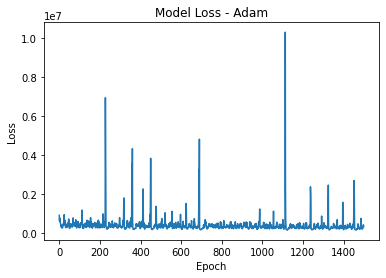

In [51]:
plt.plot(history.history['loss'])
plt.title('Model Loss - Adam')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

ניתן למערכת לחזות ערכים על אותם הנתונים

In [52]:
yhat_train = model.predict(X_train).flatten()
yhat_train

array([ 5597.2017, 31636.936 , 11879.65  , ...,  9764.24  ,  4463.3164,
       51587.133 ], dtype=float32)

נשווה בין הערכים האמיתיים לבין בערכים שהמעכת חזתה

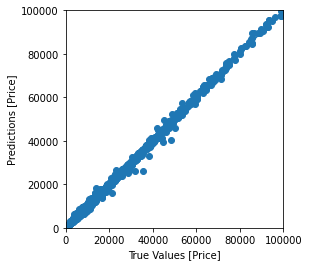

In [53]:
a = plt.axes(aspect='equal')
plt.scatter(y_train, yhat_train)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
lims = [0, 100000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

נבדוק את השגיאות של המערכת

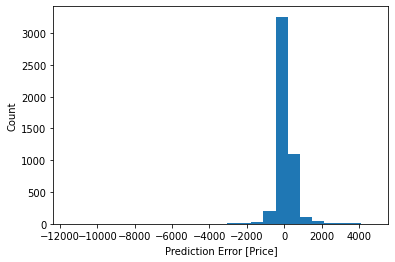

In [54]:
error = yhat_train - y_train
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Price]")
_ = plt.ylabel("Count")

In [55]:
from sklearn.metrics import r2_score
r2_score(y_train, yhat_train)

0.9986020047548017

ניתן למערכת לחזות ערכים 

In [56]:
yhat_test = model.predict(X_test).flatten()
yhat_test

array([ 4349.726 , 30493.865 ,  8124.8374, ...,  6514.432 ,  6824.973 ,
        8987.214 ], dtype=float32)

נשווה בין הערכים האמיתיים לבין בערכים שהמעכת חזתה

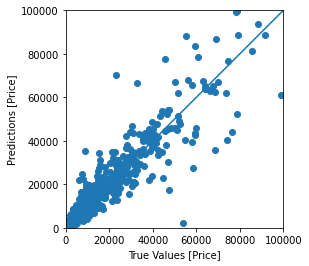

In [57]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, yhat_test)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
lims = [0, 100000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

נבדוק את השגיאות של המערכת

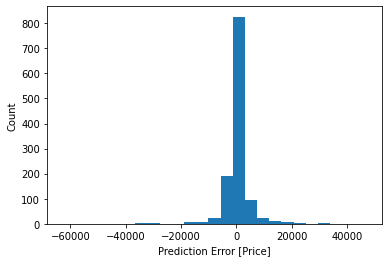

In [58]:
error = yhat_test - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Price]")
_ = plt.ylabel("Count")

In [59]:
from sklearn.metrics import r2_score
r2_score(y_test, yhat_test)

0.8530276477134707

In [60]:
df.head()

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,2010,72000,1.0,26.60,998.0,58.16,5.0,2305,1,0,0,0,0,0,1
1,2015,41000,1.0,19.67,1582.0,126.20,5.0,16470,0,1,0,0,0,0,1
2,2011,46000,1.0,18.20,1199.0,88.70,5.0,5929,0,0,0,0,1,0,1
3,2012,87000,1.0,20.77,1248.0,88.76,7.0,7905,0,1,0,0,0,0,1
4,2013,40670,2.0,15.20,1968.0,140.80,5.0,23374,0,1,0,0,0,1,0


In [61]:
df.dtypes

Year                        int64
Kilometers_Driven           int64
Owner_Type                float64
Mileage                   float64
Engine                    float64
Power                     float64
Seats                     float64
Price                       int64
Fuel_Type_CNG               uint8
Fuel_Type_Diesel            uint8
Fuel_Type_Electric          uint8
Fuel_Type_LPG               uint8
Fuel_Type_Petrol            uint8
Transmission_Automatic      uint8
Transmission_Manual         uint8
dtype: object

In [62]:
def Get_Car_Data():
    print("pls enter your car's year of production ")
    Year = input(np.int64)
    print("pls enter how much Kilometer has your car driven ")
    Kilometer_Driven = input(np.int64)
    print("pls enter your car's Fuel_Type(CNG, Diesel, Electric, LPG, Petrol) ")
    Fuel_Type = input(object)
    print("pls enter your car's Transmission (Automatic, Manual) ")
    Transmission = input(object)
    print("pls enter your car's Owner_Type ")
    Owner_Type = input(np.float64)
    print("pls enter your car's Mileage (km per liter) ")
    Mileage = input(np.float64)
    print("pls enter your car's Engin ")
    Engin = input(np.float64)
    print("pls enter your car's Engin Power ")
    Power = input(np.float64)
    print("pls enter your car's number of Seats ")
    Seats = input(np.float64)
    return Year, Kilometer_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engin, Power, Seats

In [ ]:
Year, Kilometer_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engin, Power, Seats = Get_Car_Data()
data = {'Year': [Year],
        'Kilometers_Driven': [Kilometer_Driven],
        'Owner_Type': [Owner_Type],
        'Mileage': [Mileage],
        'Engine': [Engin],
        'Power': [Power],
        'Seats': [Seats], 
        'Fuel_Type_CNG': [0],
        'Fuel_Type_Diesel': [0],
        'Fuel_Type_Electric': [0],
        'Fuel_Type_LPG': [0],
        'Fuel_Type_Petrol': [0],
        'Transmission_Automatic': [0],
        'Transmission_Manual': [0]     
          
        }

df_test = pd.DataFrame(data)
if Fuel_Type == 'Diesel':
    df_test["Fuel_Type_Diesel"] = 1
if Fuel_Type == 'CNG':
    df_test["Fuel_Type_CNG"] = 1
if Fuel_Type == 'Electric':
    df_test["Fuel_Type_Electric"] = 1
if Fuel_Type == 'LPG':
    df_test["Fuel_Type_LPG"] = 1
if Fuel_Type == 'Petrol':
    df_test["Fuel_Type_Petrol"] = 1
if Transmission == 'Automatic':
    df_test["Transmission_Automatic"] = 1
if Transmission == 'Manual':
    df_test["Transmission_Manual"] = 1
    
df_test.head()

pls enter your car's year of production 


In [ ]:
df_test['Fuel_Type_Diesel']= df_test['Fuel_Type_Diesel'].astype(np.uint8)
df_test['Fuel_Type_CNG']= df_test['Fuel_Type_CNG'].astype(np.uint8)
df_test['Fuel_Type_Electric']= df_test['Fuel_Type_Electric'].astype(np.uint8)
df_test['Fuel_Type_LPG']= df_test['Fuel_Type_LPG'].astype(np.uint8)
df_test['Fuel_Type_Petrol']= df_test['Fuel_Type_Petrol'].astype(np.uint8)
df_test['Transmission_Automatic']= df_test['Transmission_Automatic'].astype(np.uint8)
df_test['Transmission_Manual']= df_test['Transmission_Manual'].astype(np.uint8)
df_test['Year']= df_test['Year'].astype(np.int64)
df_test['Kilometers_Driven']= df_test['Kilometers_Driven'].astype(np.int64)
df_test['Owner_Type']= df_test['Owner_Type'].astype(np.float64)
df_test['Mileage']= df_test['Mileage'].astype(np.float64)
df_test['Engine']= df_test['Engine'].astype(np.float64)
df_test['Power']= df_test['Power'].astype(np.float64)
df_test['Seats']= df_test['Seats'].astype(np.float64)

In [ ]:
df_test.dtypes

In [ ]:
df_test = (df_test - df.mean()) / df.std()

In [ ]:
#fuel = ['Fuel_Type_Diesel', 'Fuel_Type_CNG', 'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol']
#for i in fuel:
    #if(df_test[i] != 0):
        #df_test[i].fillna(0, inplace = True)

In [ ]:
#trans['Transmission_Automatic', 'Transmission_Manual']
#for i in trans:
    #if(df_test[i] != 0):
        #df_test[i].fillna(0, inplace = True)

In [ ]:
df_test.head()

In [ ]:
df_test = df_test.drop(['Price'],axis=1)

In [ ]:
df_test.shape

In [ ]:
model.predict(df_test)